# Tek Değişkenli Doğrusal Regresyon

Şehir nüfusu ve her şehirde bir restoran tarafından elde edilen kârlar ile ilgili verilerimiz var. Görev,restoranın büyümesi gereken yeni şehirleri belirlemek için doğrusal regresyon kullanmaktır.  Amacımız nüfusun kârı nasıl etkilediğini belirlemektir.

In [4]:
# İlgili kütüphaneleri ekleyelim

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Şimdi verileri yükleyelim ve ilk 5 örneğe bakalım:

data = pd.read_csv("datasets/ex1data1.txt", header=None, names=['Population', 'Profit'])
                   
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
# describe() metodu ile veriler hakkında daha fazla bilgi edinmeye çalışalım:

data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


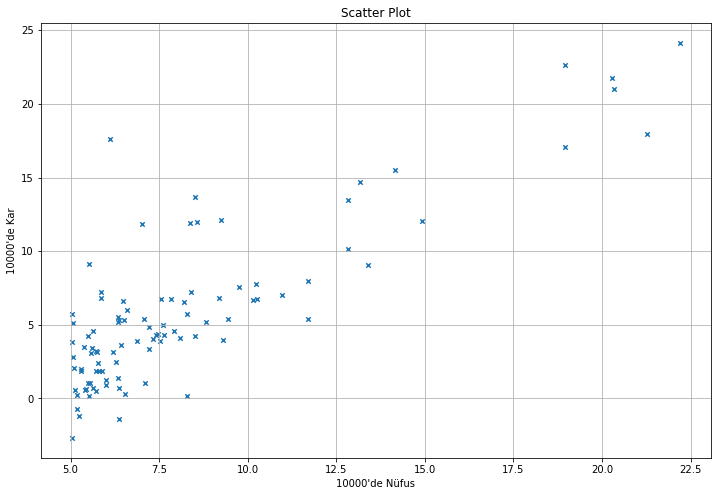

In [13]:
# Verilerinizle ilgili istatistikleri incelemek yardımcı olabilir, 
# ancak bazen verileri görselleştirmenin yollarını da bulmanız gerekir. 
# Neyse ki bu veri kümesinin sadece bir bağımlı değişkeni vardır, 
# bu yüzden neye benzediğine dair daha iyi bir fikir edinmek için bir dağılım grafiği çizebiliriz. 
# Bunun için pandas tarafından sağlanan "plot" fonksiyonunu kullanabiliriz

data.plot(kind="scatter",x="Population",y="Profit",figsize=(12,8),marker="x",grid=True)
plt.ylabel("10000'de Kar")         
plt.xlabel("10000'de Nüfus")     
plt.title('Scatter Plot')
plt.show()

Daha küçük nüfusa sahip şehirlerin etrafında bir değerler kümesi olduğunu ve şehrin büyüklüğü arttıkça kârın artması konusunda bir miktar doğrusal eğilim olduğunu açıkça görebiliriz. Şimdi eğlenceli kısma geçelim - sıfırdan python'da doğrusal bir regresyon algoritması uygulayalım!

Basitçe bazı theta parametlerini kullanarak,X'de(Population) olmayan bir değer verildiğinde, y'nin(prefit) ne olacağını tahmin edebileceğimiz bir model oluşturmaya çalışıyoruz.

Bu uygulamada,theta parametrelerini bulmak için Gradient Descent denilen bir optimizyon tekniğini kullanacağız. Doğrusal regresyon için theta parametrelerini bulmanın başka bir tekniği, parametreleri tek seferde bulan Normal Denklem'dir. Gradient Descent ise,parametreleri tek seferde bulmak yerine bir dizi matris işlemleri yaparak adım adım theta değerlerine yaklaşarak parametreleri bulmaya çalışır.

İlk olarak maliyet fonksiyonuna ihtiyacımız var. Maliyet fonksiyonu, gerçek y değerleri ile modelimizin tahmin ettiği y değerleri arasındaki farkı hesaplar.

In [30]:
# maliyet fonksiyonunu hesaplamadan önce bazı manipülasyonlar yapmamız gerekir

X_new=np.c_[np.ones((len(data),1)),data["Population"]] # X_new artık bias teriminide içeren 97x2'lik bir matristir.
y=np.array(data["Profit"]).reshape(len(y),1) # y,artık sadece Profit değerlerini içeriyor ve 97x2'lik bir matris
theta=np.zeros((2,1)) # theta değerlerini 0'a eşitleyelim

# maliyet fonksiyonu (cost function):

def maliyetHesapla(X,y,theta):
    """
    Bu fonksiyon X,y ve theta değerleri alır ve maliyeti döndürür.
    """
    maliyet = np.power((X.dot(theta)-y),2)
    return sum(maliyet)/(2*len(X))

In [31]:
# theta'lar 0 iken oluşan maliyet:
maliyetHesapla(X_new,y,theta)

array([32.07273388])

Şimdi bu maliyeti düşürmek için Gradient Descent tekniğini kullanacağız. Gradient Descent tekniğini kullanarak en iyi parametreleri bulacağız ve bu sayede maliyeti düşürmüş olacağız.

In [69]:
def gradientDescent(X,y,theta,eta,iterasyon): # eta yada alpha = öğrenme oranı
    for i in range(iterasyon):
        gradyan = (2/len(X))*(X.T.dot(X.dot(theta)-y))
        theta = theta - eta*gradyan
        
    return theta

In [75]:
new_theta = gradientDescent(X_new,y,[[0],[0]],0.01,1500)
new_theta

array([[-3.87813769],
       [ 1.19126119]])

Yeni katsayılarımız artık -3.63029144(bias) ve 1.16636235. Şimdi bu teta değerlerini, maliyeti yeniden hesaplamak ve ne kadar maliyet indirimi elde ettiğimizi görmek için kullanalım.

In [77]:
yeni_maliyet = maliyetHesapla(X_new,y,new_theta)
yeni_maliyet

array([4.47699971])

Elde ettiğimiz yeni theta değerlerini kullanarak aldığımız maliyet gördüğünüz gibi oldukça düştü.

Şimdi eğitim setindeki(X_new) verilere doğrusal regresyonu çizelim:

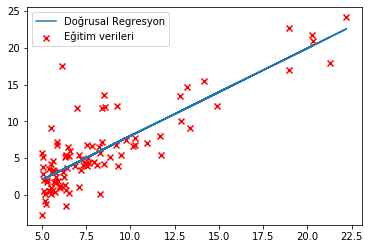

In [96]:
plt.scatter(X_new[:,1],y,c="red",marker="x",label="Eğitim verileri")
plt.plot(X_new[:,1],np.dot(X_new,new_theta),label="Doğrusal Regresyon")
plt.legend()
plt.show()

Fena değil! Çözümümüz veri kümesinin benzerine ve optimal doğrusal modele benziyor.

Şimdi iki şehrin nüfusunu gösteren iki değişkenimiz olsun. Görevimiz bu iki şehirden elde edilen kârı tahmin etmektir. Fonksiyonumuz bir şehir için nüfus içeren tek bir vektörün yanı sıra birkaç şehir için nüfus içeren bir dizi alabilir.

In [102]:
# Şimdi verilen popüslasyona göre kârı tahmin edebilmek için bir fonksiyon tanımlayalım:

ilk_sehir=3500
ikinci_sehir=70000

def tahmin(X,new_theta):
    """
    Bu fonksiyon popülasyon değeri alır ve kârı tahmin eder.
    """
    
    X=np.c_[np.ones((len(X),1)),X]
    return X.dot(new_theta)

In [106]:
tahmin([ilk_sehir,ikinci_sehir],new_theta)

array([[ 4165.53604354],
       [83384.40548698]])

In [115]:
tahmin1=tahmin([ilk_sehir],new_theta)
tahmin2=tahmin([ikinci_sehir],new_theta)

print(f"{ilk_sehir} nüfus için kâr {tahmin1} olacaktır.")
print(f"{ikinci_sehir} nüfus için kâr {tahmin2} olacaktır.")


3500 nüfus için kâr [[4165.53604354]] olacaktır.
70000 nüfus için kâr [[83384.40548698]] olacaktır.
